# Assignment 01

In this assignment, you will be using Sci-kit Learn to train and compare three models using the Cleveland heart disease data set from the UC Irvine Machine Learning Repository.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetching and pre-processing data

* **(10 points)** Fetch the Cleveland heart disease from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease). Load that data into a NumPy array.

In [2]:
# From UCI Documentation:

#%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
####################################

#take dataframe, merge, and convert to Numpy Array
merged = pd.concat([X,y], axis = 1)
heart_dis = merged.to_numpy()

heart_dis

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.],
       [38.,  1.,  3., ..., nan,  3.,  0.]])

* **(6 points)** This dataset has missing values that will need to be handled. The simplest strategy is to remove all examples containing one or more missing values. Apply that strategy to this data.

In [3]:
#to do this, we will locate the indeces of any rows with NaN values, and filter to the opposite (using '~')
print(f'Original length: {len(heart_dis)}') 
heart_dis = heart_dis[~np.isnan(heart_dis).any(axis = 1)]
print(f'New length: {len(heart_dis)}')

Original length: 303
New length: 297


* **(8 points)** The original output column has five classes (0 for the absence of heart disease and 1, 2, 3, 4 for different kinds of it). Rec-ode this column such that it only has two classes: 0 for the absence of the disease and 1 for the presence of it. In other words, the values (1, 2, 3, 4) should all be coded as 1. This will result in a more balanced data set.

In [4]:
#Steps: select target column, use where() and isin() to change 2,3,4 to 1 and keep 1 and 0 as-is.
heart_dis[:,-1] = np.where(np.isin(heart_dis[:,-1], [2,3,4]),1,heart_dis[:,-1])
np.unique(heart_dis[:,-1], return_counts = True)

(array([0., 1.]), array([160, 137]))

* **(6 points)** Split the data set into two portions: 20% for testing and the rest for training.

In [5]:
#let's first shuffle (for good luck)
np.random.shuffle(heart_dis)

#now let's do our 80/20 split

#calc index
split = int(.8*len(heart_dis)) #cast as int to not cause issues with splitting

#slice array
heart_dis_train = heart_dis[:split]
heart_dis_test = heart_dis[split:]

print(f'train length: {len(heart_dis_train)}')
print(f'test length: {len(heart_dis_test)}')

train length: 237
test length: 60


* **(8 points)** Using the training data, normalize the input features of both the training and test sets.

In [6]:
train_X = heart_dis_train[:,:-1] #store all training set input features in variable for min and max 
test_X =  heart_dis_train[:,:-1] #store all testing set input features in variable for min and max 

#get min and max across each row 
train_min = train_X.min(axis = 0)
train_max = train_X.max(axis = 0)

#repeat for testing set
test_min = test_X.min(axis = 0)
test_max = test_X.max(axis = 0)

heart_dis_train[:,:-1] = (heart_dis_train[:,:-1] - train_min)/(train_max - train_min) #normalize training set
heart_dis_test[:,:-1] = (heart_dis_test[:,:-1] - test_min)/(test_max - test_min) #normalize testing set

print(f'train set: {heart_dis_train[:5,:-1]}')
print()
print(f'test set: {heart_dis_test[:5,:-1]}')

train set: [[0.375      1.         0.66666667 0.41509434 0.29908676 0.
  1.         0.59649123 0.         0.         0.         0.
  0.        ]
 [0.27083333 1.         1.         0.43396226 0.2283105  0.
  0.         0.78947368 0.         0.         0.         0.
  0.        ]
 [0.77083333 0.         1.         0.79245283 0.23287671 1.
  0.         0.6754386  1.         0.17857143 0.5        0.66666667
  1.        ]
 [0.64583333 1.         1.         0.33962264 0.28995434 0.
  0.         0.49122807 1.         0.25       0.         0.33333333
  1.        ]
 [0.375      1.         0.66666667 0.33962264 0.28995434 0.
  0.         0.79824561 0.         0.         0.         0.
  0.        ]]

test set: [[0.22916667 1.         0.         0.43396226 0.16666667 0.
  0.         0.78947368 1.         0.25       0.         0.
  1.        ]
 [0.58333333 1.         0.33333333 0.56603774 0.24200913 0.
  1.         0.66666667 0.         0.         0.         0.33333333
  0.        ]
 [0.47916667 1.

## Training and comparing models
Using the above pre-processed data, train the following three models:

* **(12 points)** Random forests. Use grid search to find best values of both n_estimators and max-depth parameters. Print/plot the features along with their importance.

In [7]:
#Step 1: import libraries from RF and Gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

In [18]:
#Step 2: Split Training/Testing set, initialize model, set up parameter grid

X_train = heart_dis_train[:,:-1] #X: all rows, all columns except last
y_train = heart_dis_train[:,-1] #y: all rows, only last column

rf = RandomForestClassifier(random_state = 42) #use random_state for reprodutibility

param_grid = {
    'n_estimators' : [10,50,100,200] #number of trees in forest
    ,'max_depth' : [2, 5, 10, 15] #max depth of each tree
}

In [19]:
#Step 3: Perform grid search (based on accuracy), store and print best values
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'accuracy') #default 5-fold CV
grid_search.fit(X_train, y_train) #fit on training set

optimal_rf = grid_search.best_estimator_ #store rf with tuned parameters

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV accuracy: {grid_search.best_score_}') 

Best parameters: {'max_depth': 2, 'n_estimators': 100}
Best CV accuracy: 0.8565602836879433


In [20]:
#Step 4: print feature importances

importances = optimal_rf.feature_importances_ #use built-in feature to extract importances

#removed because messed up column naming (I'm too lazy to fix)
#importances = np.sort(importances)[::-1] #sort array (default = asc) and then reverse for descending (most import first)

for i, importance in enumerate(importances):
    print(f'{X.columns[i]}: {importance:.4f}')

age: 0.0312
sex: 0.0218
cp: 0.2567
trestbps: 0.0183
chol: 0.0240
fbs: 0.0000
restecg: 0.0036
thalach: 0.0890
exang: 0.1069
oldpeak: 0.0898
slope: 0.0930
ca: 0.0994
thal: 0.1662


* **(8 points)** Perceptron. Print/plot the training confusion matrix of this model.

In [28]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

perceptron = Perceptron() #initalize model using default parameters
perceptron.fit(X_train, y_train) #fit model on training data
y_pred_train = perceptron.predict(X_train) #make predictions on training(?) data, store output in variable (I would've assumed this would always be done on testing data but the a future question asks for the testing data CM's)

confusion_matrix(y_train, y_pred_train) #print confusion matrix

array([[112,  12],
       [ 27,  86]])

* **(10 points)** Multi-Layer Perceptron with two hidden layers. Use the random search to find good values for the number of units in these hidden layers. Print/plot the training confusion matrix of the model with these best values.

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

cccc

/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum itera

Best Parameters: {'hidden_layer_sizes': (257, 249)}


/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[123,   1],
       [  0, 113]])

I was having a lot of trouble converging this MLP. If you have any tips to avoid this in the future, please let me know in your comments!

* **(10 points)** Print/plot the test confusion matrices of the above three models. Plot a histogram of the test accuracies of these models.

In [32]:
#repeat logic from RF to make test set for confusion matrix
X_test = heart_dis_test[:,:-1]
y_test = heart_dis_test[:,-1]

#get predicted values for test data on all three models:

#RF
y_pred_rf = optimal_rf.predict(X_test)

#Perceptron
y_pred_perceptron = perceptron.predict(X_test) 

#MLP
y_pred_mlp = mlp_best.predict(X_test) 

#print confusion Matrices
print("Confusion Matrices:")
print()
print("RF:")
print(confusion_matrix(y_test, y_pred_rf))
print()
print("Perceptron:")
print(confusion_matrix(y_test, y_pred_perceptron))
print()
print("MLP:")
print(confusion_matrix(y_test, y_pred_mlp))

Confusion Matrices:

RF:
[[34  2]
 [ 5 19]]

Perceptron:
[[35  1]
 [ 8 16]]

MLP:
[[29  7]
 [ 9 15]]


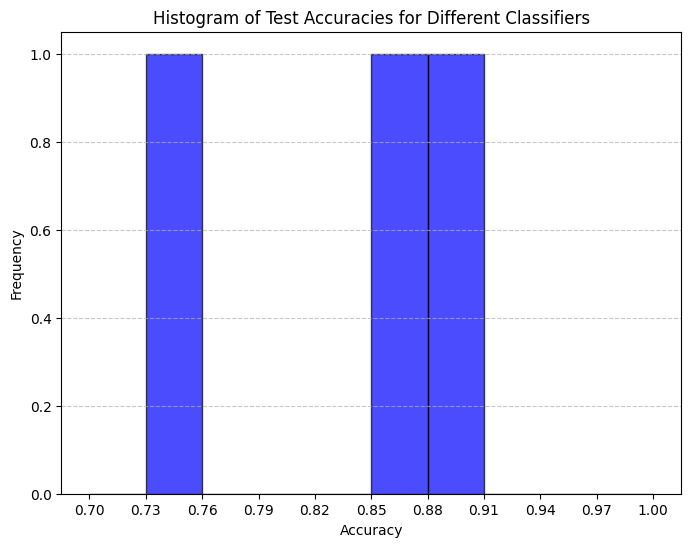

In [44]:
from sklearn.metrics import accuracy_score

pred_array = [y_pred_rf, y_pred_perceptron, y_pred_mlp] #make array with y_pred arrays for each of the three models

score_array = [] #set up array to store testing accuracies

for i in range(len(pred_array)): #create loop to go through array
    score_array.append(accuracy_score(y_test, pred_array[i])) #calculate and append each testing accuaracy to score_array

#set up histogram to plot score array
plt.figure(figsize=(8, 6))
plt.hist(score_array, bins=np.linspace(.7, 1, 11), alpha=0.7, color='blue', edgecolor='black')
plt.xticks(np.linspace(.7, 1, 11))
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram of Test Accuracies for Different Classifiers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Training with lower-dimensional data

The above data has 13 dimensions (or input features). We can use PCA to reduce this data to say 2 dimensions and then train ML models using the transformed data.

* **(8 points)** Fit a PCA model to the above training data. Then use this PCA model to transform the training data from 13 dimensions down to 2 dimensions.

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #initalize PCA model to reduce training data to 2 dimensions
X_train_pca = pca.fit_transform(X_train) #fit PCA on dataset, transform data

X_train_pca[:10] #print preview of reduced dataset

array([[-0.40383698,  0.42458511],
       [-0.56568329, -0.48843035],
       [ 0.54334428, -0.21759927],
       [ 0.71510112, -0.65843932],
       [-0.64144483, -0.49672581],
       [ 0.24256564,  0.38794951],
       [ 0.31317172, -0.5178228 ],
       [-0.56544779,  0.74445781],
       [ 0.24138536,  0.16367367],
       [-0.1970756 ,  0.54353123]])

* **(4 points)** Using the above PCA model, transform the test data to two dimensions.

In [49]:
#use same process as above, expect don't 'fit' on testing data (use training fit)

X_test_pca = pca.transform(X_test)

X_test_pca[:10]

array([[ 0.34653366, -0.78679339],
       [-0.4109655 ,  0.46616835],
       [-0.05894562,  0.22345649],
       [ 1.14583543,  0.32286288],
       [ 0.2313432 ,  0.19212505],
       [-0.85110546,  0.77232651],
       [-0.42930502, -0.38697605],
       [ 0.05722237, -0.6140757 ],
       [-0.09833313,  0.57511468],
       [ 0.71437693,  0.59463667]])

* **(10 points)** Train an MLP model on the transformed training data and evaluate it on the transformed test data. Print/plot its confusion matrix and print its accuracy.

In [51]:
#I am going to re-use the steps from the earlier MLP problem and re-tune the model since the training data has been transformed

mlp = MLPClassifier() #initalize MLP classifier

#create dictionary for hyperparameter tuning
params = { 'hidden_layer_sizes': [(np.random.randint(100, 300), np.random.randint(100, 300)) for _ in range(40)]} #use numpy random int generator to get 40 combinations of the units (100-299) for each of the two hidden layers

random_search = RandomizedSearchCV(mlp, param_distributions = params) #initalize random search for tuning
random_search.fit(X_train_pca, y_train) #fit on training set

print("Best Parameters:", random_search.best_params_) #print best parameters

mlp_best = random_search.best_estimator_ #re-initalize model with tuned parameters
y_pred = mlp_best.predict(X_test_pca) #test on unseen data

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) #print CM
print()
print(f"Accuracy Score:{accuracy_score(y_test, y_pred)}")

/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/uufs/chpc.utah.edu/sys/installdir/r8/python/3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum itera

Best Parameters: {'hidden_layer_sizes': (298, 240)}
Confusion Matrix:
[[33  3]
 [11 13]]

Accuracy Score:0.7666666666666667


I appears to have a slightly higher accuarcy with PCA transformation! But still nothing to write home about.